<a href="https://colab.research.google.com/github/devGabrielDias/ProjetoRegressaoRestic36/blob/main/An%C3%A1lise_e_Modelagem_de_Taxa_de_Engajamento_de_Influenciadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Modelagem de Taxa de Engajamento de Influenciadores

1. Definição e Preparação do Problema

- Acesso do Conjunto de Dado: O aluno deve acessar o cojunto de dados através do seguinte
link: Link para acesso aos dados.

- Análise Exploratória: Realize uma análise exploratória dos dados e destaque variáveis
importantes, através de demonstações de potenciais relações entre as variáveis.
considerando a taxa de engajamento como a variável dependente do nosso modelo

2. Implementação do Algoritmo de Regressão Linear


*   Desenvolvimento: Implemente a Regressão Linear utilizando Python (Scikit-Learn ou
código próprio).
*   Configurações do Algoritmo: Teste diferentes combinações de tratamento de dados e de
variáveis independentes.

3. Otimização e Ajustes

*    Escolha do Algoritmo de Otimização: Utilize o gradiente descendente para minimizar a
função de custo. Considere também métodos alternativos, como os mínimos quadrados.
*    Hiperparâmetros: A taxa de aprendizado é crucial para determinar a velocidade de
convergência do modelo. Ajustes nesta taxa podem impactar significativamente o
desempenho. Além disso, o número de épocas (iterações) deve ser escolhido.
*    Regularização: Aplique técnicas de regularização, como Lasso (L1) e Ridge (L2).
*    Normalização dos Dados: Aplique técnicas de normalização ou padronização das variáveis
para facilitar a convergência do modelo e melhorar a eficácia do treinamento.
*    Validação Cruzada: Aplique validação cruzada para garantir que o modelo não apenas se
ajuste aos dados de treinamento, mas também generalize bem para dados não vistos.
*    Seleção de Recursos: Considere a aplicação de métodos de seleção de recursos para
identificar e incluir apenas as variáveis mais significativas no modelo, incluindo analises de
correlação.
4. Análise e Visualização dos Resultados

*    Métricas de Avaliação: Calcule e apresente as métricas de desempenho adequadas para o
problema, como R², MSE e Erro Absoluto Médio (MAE) para avaliar a performance do
modelo. Essas métricas devem ser comparadas em um conjunto de dados de teste para
garantir que o modelo generalize bem.
*    Interpretação dos Coeficientes: É importante interpretar os coeficientes obtidos no
modelo de regressão. Eles indicam o impacto de cada variável independente sobre a
variável dependente, ajudando na análise dos resultados.
*    Visualizações Gráficas: Crie visualizações para mostrar o comportamento do modelo.



## 1. Análise Exploratória

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    object 
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    object 
 8   total_likes        200 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 15.8+ KB
None
             rank  influence_score     followers     avg_likes  \
count  200.000000       200.000000  2.000000e+02  2.000000e+02   
mean   100.500000        81.820000  7.740950e+07  1.787104e+06   
std     57.879185         8.878159  7.368727e+07  2.1

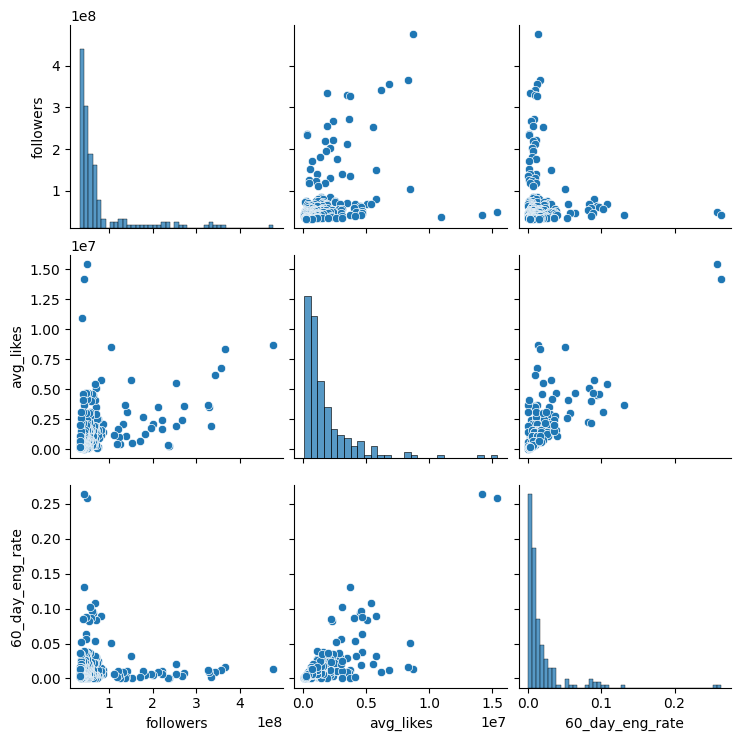

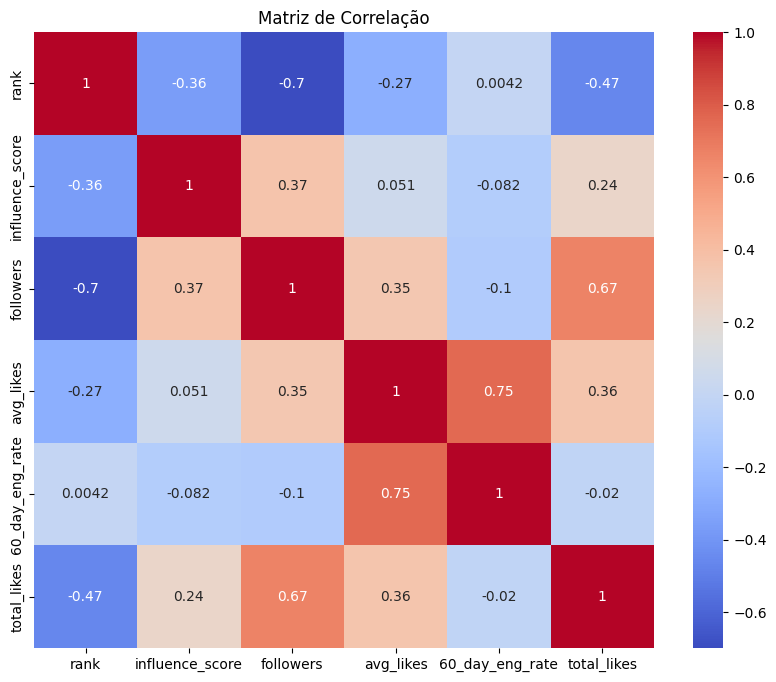

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
file_path = 'top_insta_influencers_data.csv'  # Atualize com o caminho correto
data = pd.read_csv(file_path)

# Pré-processar dados: Converter colunas com sufixos
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    return value

columns_to_convert = ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes', '60_day_eng_rate']
for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_numeric)

# Resumo dos dados
print(data.info())
print(data.describe())

# Visualizações exploratórias
sns.pairplot(data[['followers', 'avg_likes', '60_day_eng_rate']])
plt.show()

# Selecionar apenas colunas numéricas para o heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## 2. Implementação do Algoritmo de Regressão Linear

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = data.dropna(subset=['60_day_eng_rate'])

# Seleção de variáveis
X = data[['followers', 'avg_likes', 'influence_score']]
y = data['60_day_eng_rate']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.0002862337661557805
Mean Absolute Error (MAE): 0.0108624655082814
R² Score: 0.5359186590632095


## 3. Otimização e Ajustes

In [ ]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

# Avaliação Ridge
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge MSE: {ridge_mse}, R²: {ridge_r2}")

# Avaliação Lasso
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso MSE: {lasso_mse}, R²: {lasso_r2}")


Ridge MSE: 0.0002845657854408146, R²: 0.5386230175924434
Lasso MSE: 0.0006178603580257902, R²: -0.0017597410510941103


## 4. Análise e Visualização dos Resultados

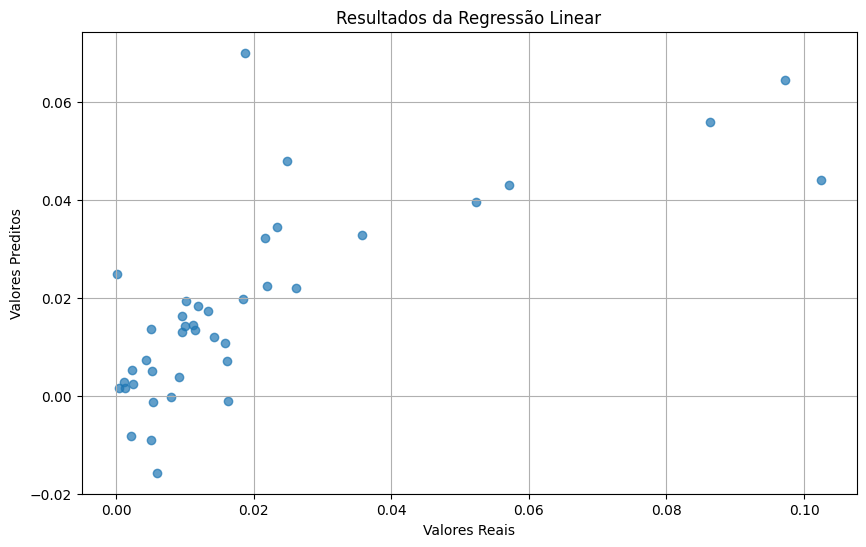

          Variável   Coeficiente
0        followers -2.226924e-10
1        avg_likes  1.480789e-08
2  influence_score  2.911285e-04


In [ ]:

# Visualização dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Resultados da Regressão Linear')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.grid(True)
plt.show()

# Coeficientes do modelo
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': model.coef_
})
print(coef_df)
